In [1]:
# 필요한 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame as df

### 일별 확진자 수

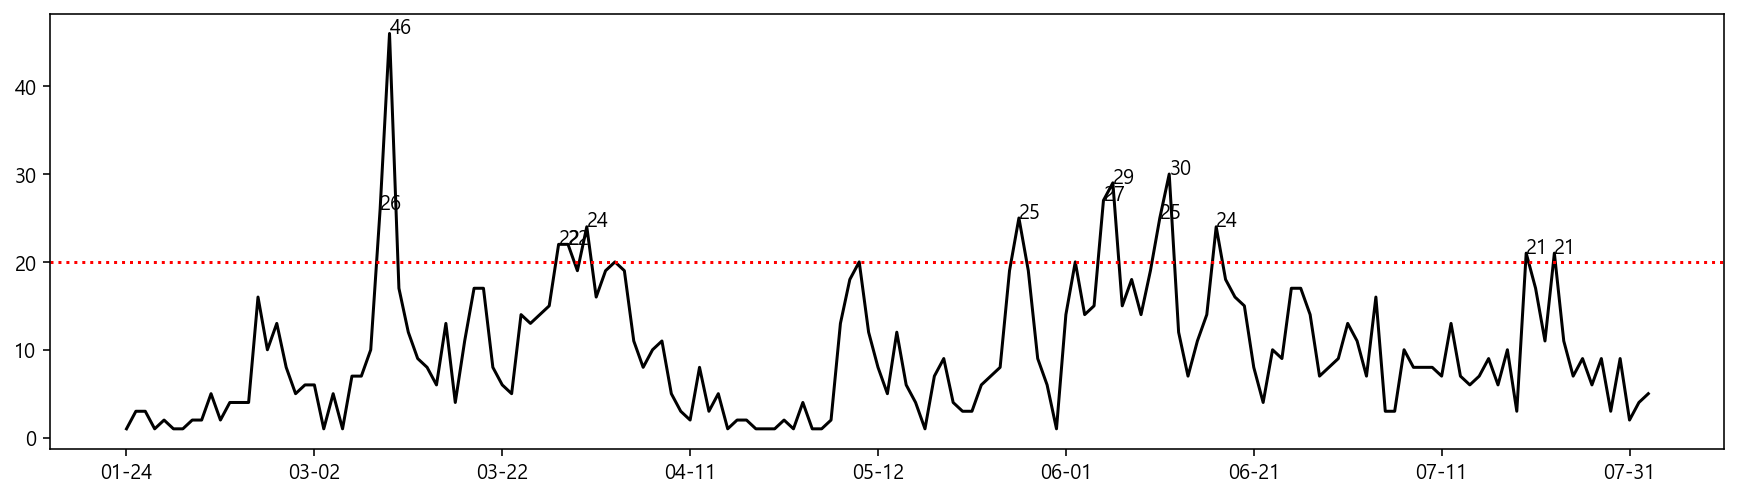

In [16]:
# 일 확진자 수가 20이상일 경우 확진자 수 표시

g = day_count.plot(color = 'k', figsize =(15,4))
g.axhline(20, color = 'r', linestyle = ':')
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

Text(0, 0.5, '확진자수')

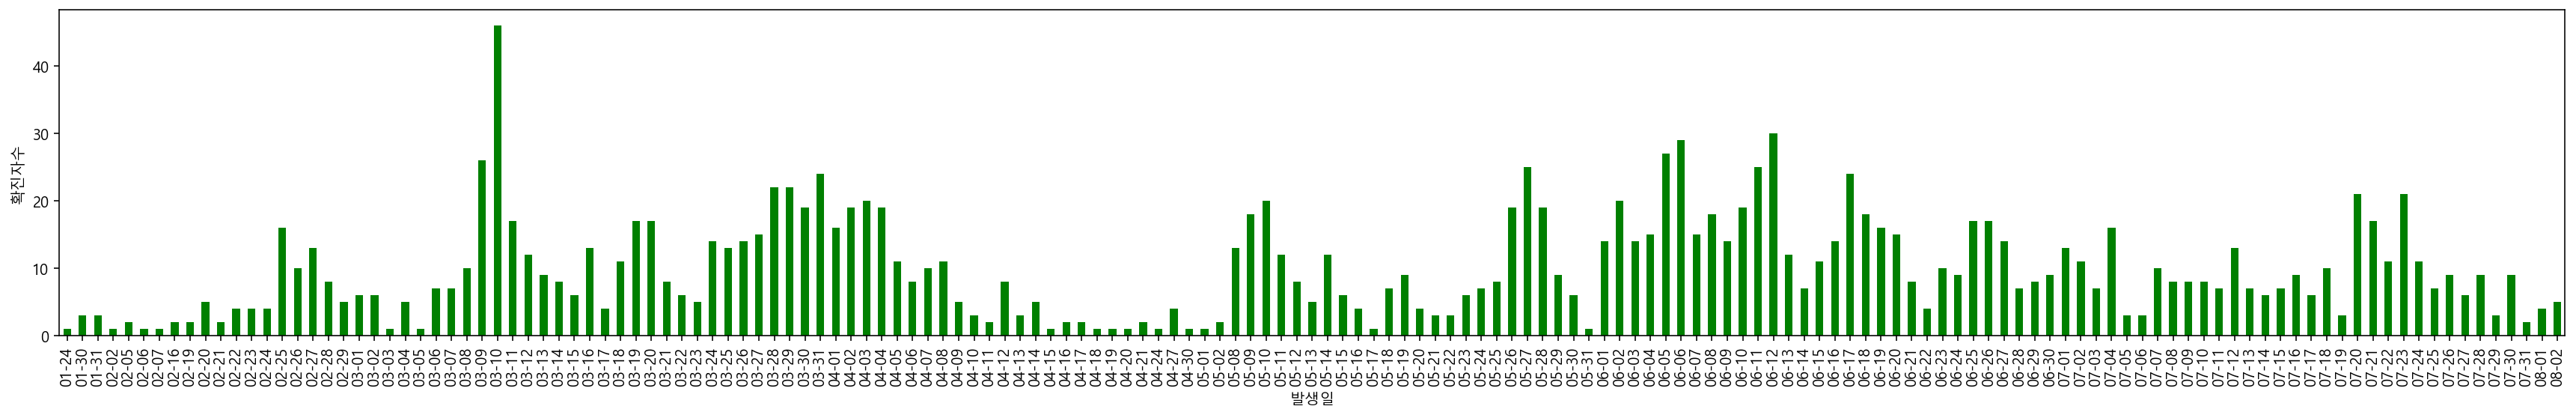

In [17]:
# 같은 내용 막대그래프로 그리기

day_count.plot.bar(color = 'g',figsize=(30,4))
plt.xlabel('발생일')
plt.ylabel('확진자수')

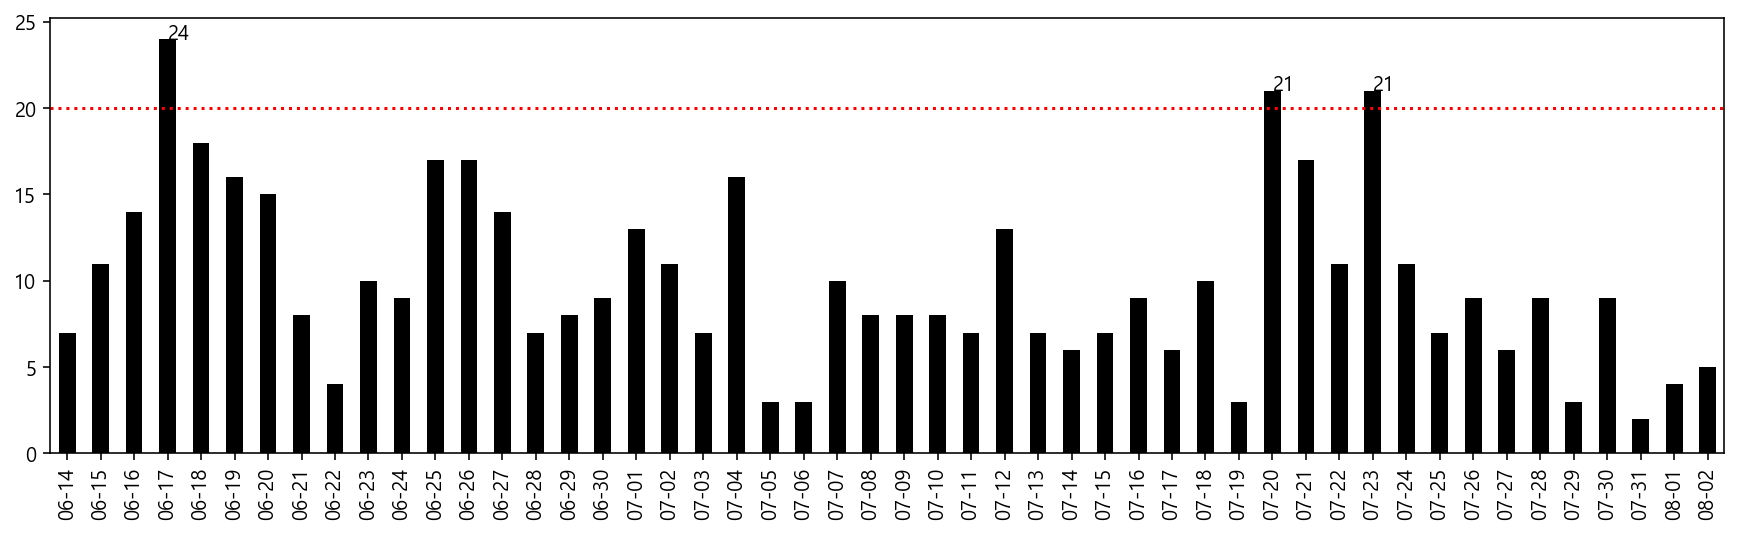

In [18]:
# 최근발생 50건에 대해서만 그래프 그리기

g = day_count[-50:].plot.bar(color = 'k', figsize =(15,4))
g.axhline(20, color = 'r', linestyle = ':')
for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

In [19]:
# 확진자가 가장 많이 나온 날

day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [20]:
# 확진자가 가장 많이 나온 날의 확진자 데이터

df[df['확진일']=='2020-03-10'].head()

,연번,환자번호,감염경로,확진일,거주지,격리시설
1410,202,7567,콜센터직원 접촉,2020-03-10,노원구,서울의료원(퇴원)
1411,201,7711,콜센터직원 접촉,2020-03-10,노원구,서울의료원(퇴원)
1412,200,7555,구로구 콜센터 관련,2020-03-10,구로구,서남병원(퇴원)
1413,199,7725,구로구 콜센터 관련,2020-03-10,양천구,서남병원(퇴원)
1414,198,7539,콜센터직원 접촉,2020-03-10,양천구,서남병원(퇴원)


In [21]:
# 데이터프레임 DATE에 확진 월을 나타내는 컬럼 추가하기

DATE['월'] = DATE['월일'].astype(str).map(lambda x:x[:2])

<ipython-input-21-2fcdeb6c74dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATE['월'] = DATE['월일'].astype(str).map(lambda x:x[:2])


In [22]:
DATE.head()

,연번,확진일,월일,월
0,1612,2020-08-02,08-02,08
1,1611,2020-08-02,08-02,08
2,1610,2020-08-02,08-02,08
3,1609,2020-08-02,08-02,08
4,1608,2020-08-02,08-02,08


### 월별 확진자 수

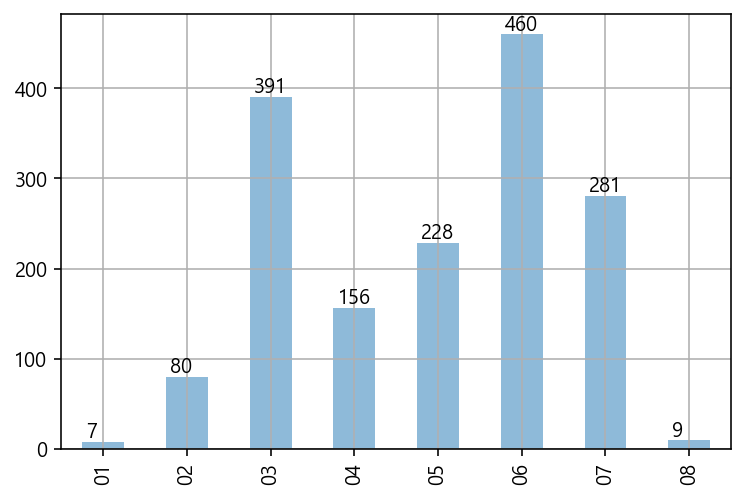

In [23]:
# 월별 확진자 수 시각화

month_case = DATE['월'].value_counts().sort_index()
g = month_case.plot.bar(grid = True, alpha = 0.5) #alpha는 투명도
for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+5, s = month_case.iloc[i])
    # text 위치를 조정해주기위해 x축으로 -0.2, y축으로 +5

In [24]:
# 데이터프레임 DATE에 확진 주를 나타내는 컬럼 추가하기(주는 2020년 1월 기준)

DATE['주'] = DATE['확진일'].dt.week # 내장함수 이용
DATE.head()

<ipython-input-24-a420f6141256>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATE['주'] = DATE['확진일'].dt.week # 내장함수 이용


,연번,확진일,월일,월,주
0,1612,2020-08-02,08-02,08,31
1,1611,2020-08-02,08-02,08,31
2,1610,2020-08-02,08-02,08,31
3,1609,2020-08-02,08-02,08,31
4,1608,2020-08-02,08-02,08,31


### 누적 확진자 수
#### 일일 확진자 수 0명인 날짜 포함

In [25]:
# 첫번째 확진자 발생일과 가장 최근 확진자 발생일을 구한다

first_day = DATE['확진일'].iloc[-1]
last_day = DATE['확진일'].iloc[0]

days = pd.date_range(first_day, last_day)

days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
               '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-01', '2020-08-02'],
              dtype='datetime64[ns]', length=192, freq='D')

In [26]:
# 확진자가 한명도 없었던 날을 채워, (확진일, 확진자수) DF 만들기

df_days = pd.DataFrame({'확진일': days})
df_days.head()

,확진일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [27]:
df_daily_case = df['확진일'].value_counts().to_frame()
df_daily_case.head()

,확진일
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [28]:
df_daily_case.rename(columns = {'확진일':'확진자 수'}, inplace = True)
df_daily_case.head()

,확진자 수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [29]:
all_day = df_days.merge(df_daily_case, left_on = '확진일',
                       right_on = df_daily_case.index, how='left')

all_day.head()

,확진일,확진자 수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [30]:
# 확진자 수가 null일 때 0으로 표시

all_day.fillna(0, inplace = True)
all_day.head()

,확진일,확진자 수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0


In [31]:
# 누적 확진자수 표시해주기

all_day['누적 확진자 수'] = all_day['확진자 수'].cumsum()

all_day.head()

,확진일,확진자 수,누적 확진자 수
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0


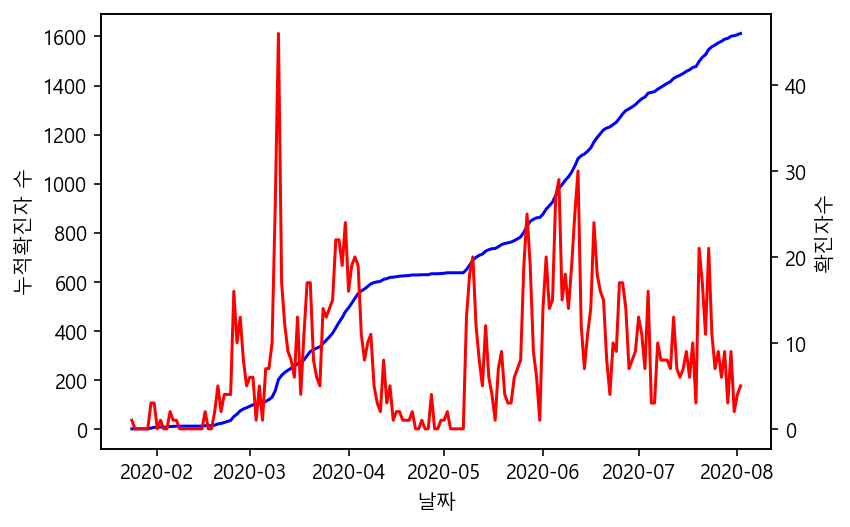

In [32]:
# 2개의 y축을 가진 확진자, 누적확진자 수 그래프 그리기

x = all_day['확진일']
y1 = all_day['누적 확진자 수']
y2 = all_day['확진자 수']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() #twinx()를 이용해 두 그래프가 x축을 공유
ax1.plot(x, y1, color='b')
ax2.plot(x, y2, color='r')

ax1.set_xlabel('날짜')
ax1.set_ylabel('누적확진자 수')

ax2.set_xlabel('날짜')
ax2.set_ylabel('확진자수')

plt.show()

In [33]:
# 주간 확진자 수 정보를 담은 DF 만들기

week_case = DATE['주'].value_counts().sort_index().to_frame()
week_case.rename(columns = {'주': '주별 확진자 수'}, inplace = True)
week_case.head()

,주별 확진자 수
4,1
5,7
6,4
7,2
8,17


In [34]:
week_case['월'] = ""
week_case.head()

,주별 확진자 수,월
4,1,
5,7,
6,4,
7,2,
8,17,


In [35]:
week_case.reset_index(inplace = True)
week_case.head()

,index,주별 확진자 수,월
0,4,1,
1,5,7,
2,6,4,
3,7,2,
4,8,17,


In [36]:
week_case.rename(columns = {'index': '주'}, inplace = True)
week_case.head()

,주,주별 확진자 수,월
0,4,1,
1,5,7,
2,6,4,
3,7,2,
4,8,17,


In [37]:
for i in range(len(week_case)):
    if 1<= week_case['주'][i] <= 5:
        week_case['월'][i] = 'Jan'
    elif 6<= week_case['주'][i] <= 9:
        week_case['월'][i] = 'Feb'
    elif 10<= week_case['주'][i] <= 14:
        week_case['월'][i] = 'Mar'
    elif 15<= week_case['주'][i] <= 18:
        week_case['월'][i] = 'Apr'
    elif 19<= week_case['주'][i] <= 23:
        week_case['월'][i] = 'May'
    elif 24<= week_case['주'][i] <= 27:
        week_case['월'][i] = 'Jun'
    elif 28<= week_case['주'][i] <= 31:
        week_case['월'][i] = 'Jul'
    elif 31<= week_case['주'][i] <= 35:
        week_case['월'][i] = 'Aug'
    elif 36<= week_case['주'][i] <= 39:
        week_case['월'][i] = 'Sep'
    elif 40<= week_case['주'][i] <= 43:
        week_case['월'][i] = 'Oct'
    elif 44<= week_case['주'][i] <= 47:
        week_case['월'][i] = 'Nov'
    else:
        week_case['월'][i] = 'Dec'

<ipython-input-37-fa93573485ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_case['월'][i] = 'Jan'
<ipython-input-37-fa93573485ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_case['월'][i] = 'Feb'
<ipython-input-37-fa93573485ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_case['월'][i] = 'Mar'
<ipython-input-37-fa93573485ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [38]:
week_case.head()

,주,주별 확진자 수,월
0,4,1,Jan
1,5,7,Jan
2,6,4,Feb
3,7,2,Feb
4,8,17,Feb


In [39]:
# 히트맵을 그리기 위한 DF hm생성

hm = week_case.pivot('주', '월', '주별 확진자 수')
hm.fillna(0, inplace = True)
hm

월,Apr,Feb,Jan,Jul,Jun,Mar,May
주,,,,,,,
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,7.0,0.0,0.0,0.0,0.0
6,0.0,4.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,0.0,0.0,0.0,0.0,0.0
8,0.0,17.0,0.0,0.0,0.0,0.0,0.0
9,0.0,62.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,37.0,0.0
11,0.0,0.0,0.0,0.0,0.0,124.0,0.0
12,0.0,0.0,0.0,0.0,0.0,76.0,0.0


In [40]:
# 칼럼 순서 바꿔주기

hm = hm[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']]

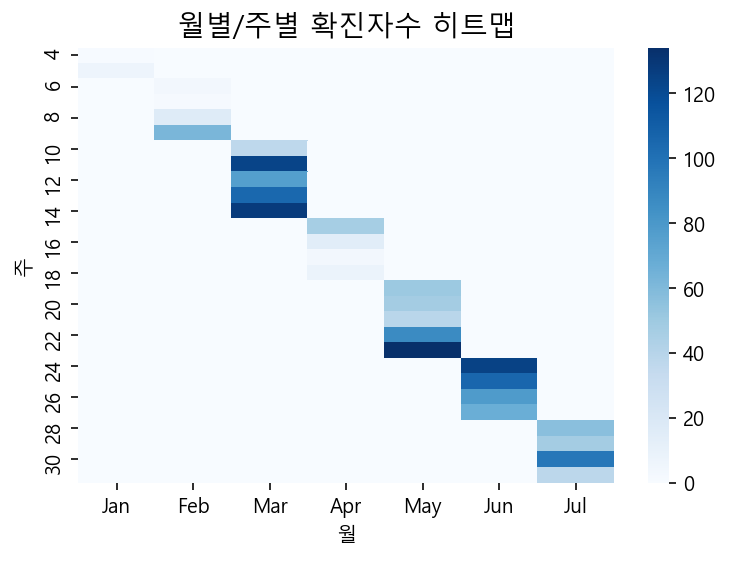

In [41]:
# 주별 확진자수로 히트맵 그리기

g = sns.heatmap(hm, cmap = 'Blues')
plt.title('월별/주별 확진자수 히트맵', fontsize = 14)
plt.show()